In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plp

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [5]:
df = df[['engine_displacement','horsepower',
'vehicle_weight','model_year','fuel_efficiency_mpg']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [7]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

horesepower is the only column with missing values

In [8]:
df.horsepower.median()

149.0

median value of horsepower is 149

In [89]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [90]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [91]:
df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

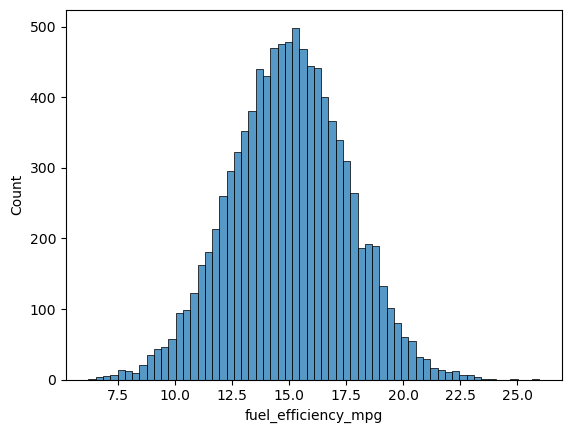

In [92]:
sns.histplot(df.fuel_efficiency_mpg);

In [93]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [94]:
del df_train['fuel_efficiency_mpg']
del df_val["fuel_efficiency_mpg"]
del df_test['fuel_efficiency_mpg']

In [96]:
# to confirm if the target variable have been deleted
check = [df_test, df_train, df_test]
for col in check:
    print('fuel_efficiency_mpg'  in col.columns)
    

False
False
False


In [97]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [98]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [99]:
df_train.horsepower.mean()

149.5732766586583

In [100]:
X_train_zero = df_train.fillna(0).values
w0, w =train_linear_regression(X_train_zero, y_train)


X_val_zero = df_val.fillna(0).values
y_pred = w0 + X_val_zero.dot(w)

rmse(y_val, y_pred)

0.522806997480988

In [101]:
X_train_mean = df_train.fillna(df_train.horsepower.mean()).values
w0, w =train_linear_regression(X_train_mean, y_train)


X_val_mean = df_val.fillna(df_train.horsepower.mean()).values
y_pred = w0 + X_val_zero.dot(w)

rmse(y_val, y_pred)

0.6210766339318806

 Filling the missing values with zero produced a better RMSE (0.52280) than when filled with the mean (0.62108)

In [102]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [103]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # X_train = prepare_X(df_train)
    w0, w =train_linear_regression_reg(X_train_zero, y_train, r=r)


    # X_val = prepare_X(df_val)
    X_val_zero * w[0]
    y_pred = w0 + X_val_zero.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 25.90435761114612 0.522806997480988
0.01 22.36566580338446 0.523077387534454
0.1 10.031903478782592 0.5260746881683305
1 1.539917439318768 0.529971757231491
5 0.32336727416426986 0.5306504452034331
10 0.16270272429744864 0.5307423097117518
100 0.016369304829391897 0.5308264158427356


When `r` is set to `0` came out with both lower rmse and lower r

In [104]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [105]:

###
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_score = []
for num in seed:
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    np.random.seed(num)
    idx = np.arange(n)
    np.random.shuffle(idx)
    ###
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()
    ###
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
###
    del df_train['fuel_efficiency_mpg']
    del df_val["fuel_efficiency_mpg"]
    del df_test['fuel_efficiency_mpg']
###

    X_train_zero = df_train.fillna(0).values
    w0, w =train_linear_regression(X_train_zero, y_train)


    X_val_zero = df_val.fillna(0).values
    # y_pred = w0 + X_val_zero * w[0]
    y_pred = w0 + X_val_zero.dot(w)


    score = rmse(y_val, y_pred)
    rmse_score.append(score)
print(rmse_score)
print(round(np.std(rmse_score) , 3))

[0.5206531296322084, 0.521338891285115, 0.522806997480988, 0.5159516741274607, 0.5109129460079264, 0.5283406460097169, 0.5313910658176215, 0.5090670387351816, 0.5147399129251412, 0.5131865908516763]
0.007


`0.006` is the closest to the `std value` i got `0.007`

In [111]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
###
df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()
###
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
###
del df_train['fuel_efficiency_mpg']
del df_val["fuel_efficiency_mpg"]
del df_test['fuel_efficiency_mpg']

In [112]:
df_full_train = pd.concat([df_train, df_val])

In [113]:
y_full_train = np.concatenate([y_train, y_val])

In [114]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [115]:
X_full = df_full_train.fillna(0).values
w0, w =train_linear_regression(X_full, y_full_train)


In [116]:
w

array([ 1.42958143e-05,  3.56474528e-03, -5.01717951e-03,  1.13344611e-03])

In [117]:
X_test = df_test.fillna(0).values

y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

score

0.5156132021984322

`0.515` is the closest to my own rmse score `(0.5156)`